<a href="https://colab.research.google.com/github/manujsinghwal/uber-partner-business-modeling/blob/main/uber_partner_business_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Partner Business Modeling

### Data Exploration
Let's start with reading and exploring the dataset. First, import pandas and NumPy as always.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Mounting Google drive as dataset stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# Reading .csv file from Google drive directory
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/uber_partner.csv')
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


It seems we have a dataset that includes taxi driver statistics. Let's check if there are any null values.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


Hence, no null values. But, we need to remove the `%` sign from `Accept Rate` column, needed for further data analysis.

In [20]:
df['Accept Rate'] = (
    df['Accept Rate']
    .str.replace('%','')
    .astype('int64')
    )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    int64  
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [23]:
# Renaming columns
df.columns = [c.replace(' ', '') for c in df.columns]

In [24]:
df.head()

,Name,TripsCompleted,AcceptRate,SupplyHours,Rating
0,Abdul,1,100,3,4.8
1,Abraham,12,83,5,4.7
2,Adelina,1,100,2,4.7
3,Akilah,1,100,2,4.9
4,Alec,21,76,11,5.0


Now, we will have some bar plots to observe statistics distribution over taxi drivers. We will define a function to use multiple times in plotting.

In [41]:
# Setting up the figure size for further visualizations
plt.rcParams["figure.figsize"] = (10,6)

# Defining a function to annotating on the bars
def annotating_plot(ax):
  for c in ax.containers:
      # If the segment is small or 0, we can customize the labels
      labels = []
      for v in c:
          if v.get_height() > 1:
              labels.append(v.get_height())
          else:
              labels.append('')
      ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

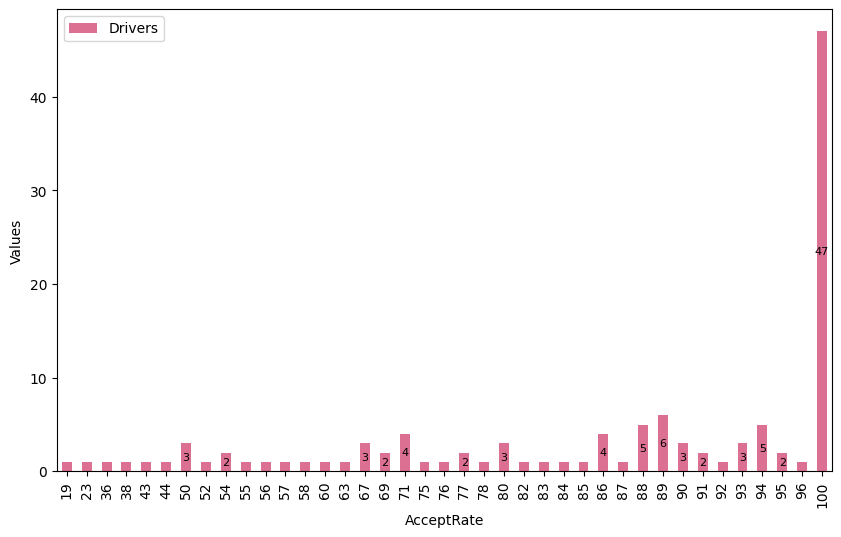

In [42]:
ax1 = (
      df[['Name', 'AcceptRate']]
      .rename(columns={'Name':'Drivers'})
      .groupby('AcceptRate')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='AcceptRate', color='palevioletred')
    )

# Annotating on the bars
annotating_plot(ax1)

plt.ylabel("Values")
plt.show()

The majority of taxi drivers have an acceptance rate of over 95%. We will continue with ratings.

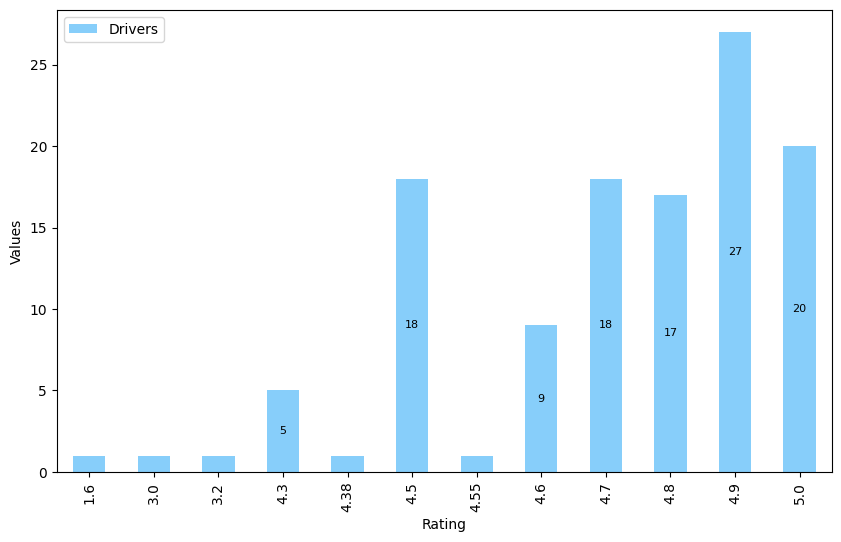

In [47]:
ax2 = (
      df[['Name', 'Rating']]
      .rename(columns={'Name':'Drivers'})
      .groupby('Rating')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='Rating', color='lightskyblue')
    )

# Annotating on the bars
annotating_plot(ax2)

plt.ylabel("Values")
plt.show()

It seems that, there are just a few taxi drivers who have a rating lower than 4.5.

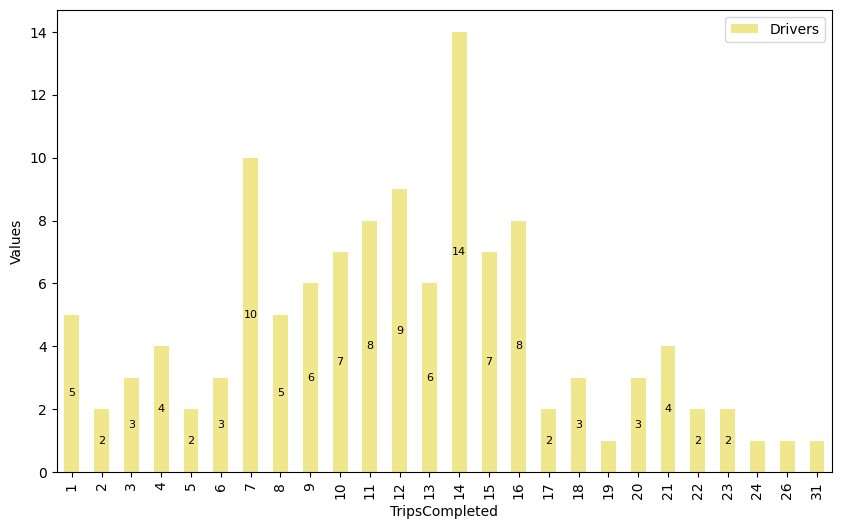

In [48]:
ax3 = (
      df[['Name', 'TripsCompleted']]
      .rename(columns={'Name':'Drivers'})
      .groupby('TripsCompleted')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='TripsCompleted', color='khaki')
    )

# Annotating on the bars
annotating_plot(ax3)

plt.ylabel("Values")
plt.show()

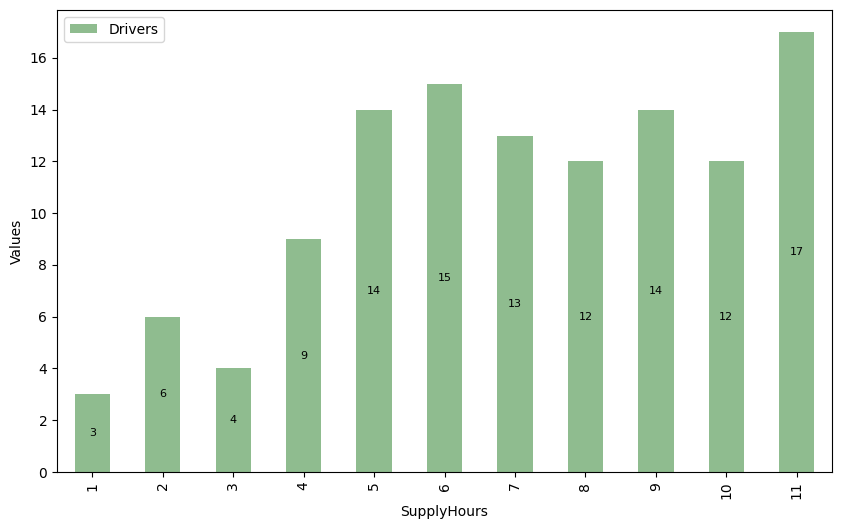

In [50]:
ax4 = (
      df[['Name', 'SupplyHours']]
      .rename(columns={'Name':'Drivers'})
      .groupby('SupplyHours')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='SupplyHours', color='darkseagreen')
    )

# Annotating on the bars
annotating_plot(ax4)

plt.ylabel("Values")
plt.show()

Most taxi drivers work more than 5 hours. Now we can move forward with questions!